In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
#load dataset
rating = pd.read_csv('https://raw.githubusercontent.com/AqillaSM/DatasetNavomobility/main/tourism_rating.csv')
tourism = pd.read_csv('https://raw.githubusercontent.com/AqillaSM/DatasetNavomobility/main/tourism_with_id.csv')

In [ ]:
tourism

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [ ]:
rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


# Data Preprocessing

In [ ]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [ ]:
all_tourism = pd.merge(rating,tourism[["Place_Id","Place_Name","Description","Rating","City","Category",]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Rating,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,4.6,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",4.1,Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,4.5,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,4.5,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,4.0,Yogyakarta,Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,4.1,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,4.7,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,4.3,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,4.8,Bandung,Tempat Ibadah


In [ ]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
Rating           0
City             0
Category         0
dtype: int64

In [ ]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Rating,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,4.6,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",4.1,Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,4.5,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,4.5,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,4.0,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,4.1,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,4.7,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,4.3,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,4.8,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


In [ ]:
datapreparation= all_tourism.drop_duplicates("Place_Id")
datapreparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Rating,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,4.6,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",4.1,Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,4.5,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,4.5,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,4.0,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,4.2,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,4.0,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,4.5,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,4.5,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [ ]:
place_id = datapreparation.Place_Id.tolist()

place_name = datapreparation.Place_Name.tolist()

place_category = datapreparation.Category.tolist()

place_desc = datapreparation.Description.tolist()

place_rat = datapreparation.Rating.tolist()

place_city = datapreparation.City.tolist()

city_category = datapreparation.city_category.tolist()

In [ ]:
tourism_complete = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "rating":place_rat,
    "city": place_city,
    "city_category":city_category
})

tourism_complete

,id,name,category,description,rating,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,4.6,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",4.1,Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,4.5,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,4.5,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,4.0,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,4.2,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,4.0,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,4.5,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,4.5,Jakarta,Jakarta Cagar Alam


# Content Based Filtering

In [ ]:
data_content = tourism_complete
data_content.sample(5)

,id,name,category,description,rating,city,city_category
121,381,Tugu Muda Semarang,Budaya,"Tugu Muda (""Monumen Pemuda"" Indonesia) adalah ...",4.7,Semarang,Semarang Budaya
366,123,Kampung Wisata Rejowinangun,Budaya,Kampung wisata Rejowinangun terletak di Kelura...,4.3,Yogyakarta,Yogyakarta Budaya
201,90,Kampung Wisata Taman Sari,Taman Hiburan,Taman Sari Yogyakarta atau Taman Sari Keraton ...,4.6,Yogyakarta,Yogyakarta Taman Hiburan
136,116,Jurang Tembelan Kanigoro,Taman Hiburan,Jurang Tembelan Kanigoro berada di Desa Wisata...,4.5,Yogyakarta,Yogyakarta Taman Hiburan
65,70,Perpustakaan Nasional,Budaya,Perpustakaan Nasional adalah perpustakaan yang...,4.7,Jakarta,Jakarta Budaya


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data_content['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [ ]:
cv_matrix = cv.transform(data_content['city_category'])

cv_matrix.shape

(437, 15)

In [ ]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [ ]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data_content.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Sam Poo Kong Temple,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
The World Landmarks - Merapi Park Yogyakarta,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
Bumi Perkemahan Batu Kuda,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Lembang Park & Zoo,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Pantai Sepanjang,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_data = cosine_similarity(cv_matrix)
similarity_data

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
similarity_df = pd.DataFrame(similarity_data,index=data_content['name'],columns=data_content['name'])
similarity_df.sample(5,axis=1).sample(10,axis=0)

name,Pantai Baruna,Rumah Batik,Gereja Perawan Maria Tak Berdosa Surabaya,Masjid Agung Trans Studio Bandung,Dago Dreampark
name,,,,,
Saloka Theme Park,0.408248,0.0,0.0,0.000000,0.666667
Candi Ratu Boko,0.000000,0.5,0.0,0.000000,0.000000
Museum Layang-layang,0.000000,0.5,0.0,0.000000,0.000000
Seribu Batu Songgo Langit,0.000000,0.0,0.0,0.000000,0.000000
Durian Gardens and Tourism Education Watu Simbar,0.408248,0.0,0.0,0.000000,0.000000
Museum Basoeki Abdullah,0.000000,0.5,0.0,0.000000,0.000000
Pantai Timang,0.500000,0.0,0.0,0.000000,0.000000
Keraton Yogyakarta,0.000000,0.5,0.0,0.000000,0.000000
Museum Gedung Sate,0.000000,0.5,0.0,0.408248,0.408248


In [ ]:
def rekomendasi_wisata_by_keyword(nama_tempat_input, nama_budaya_input,  similarity_data=similarity_df, items=data_content[['name', 'category', 'description', 'rating','city']], k=5):
    kata_kunci = f"{nama_tempat_input, nama_budaya_input}"
    kata_kunci_vector = cv.transform([kata_kunci])
    similarity_with_keyword = cosine_similarity(cv_matrix, kata_kunci_vector)
    similarity_with_keyword_df = pd.DataFrame(similarity_with_keyword, index=data_content['name'], columns=['Similarity'])
    sorted_places = similarity_with_keyword_df.sort_values(by='Similarity', ascending=False)
    recommended_places = sorted_places[sorted_places.index != kata_kunci].head(k)
    recommended_places_info = recommended_places.merge(items, left_index=True, right_on='name')

    return recommended_places_info

In [ ]:
nama_tempat_input = 'Tugu'  # GANTI SESUAI YANG DI SEARCH
nama_budaya_input = 'Surabaya'  # GANTI SAMA NAMA KOTA DI LIST

recommendasi = rekomendasi_wisata_by_keyword(nama_kota_input, nama_tempat_input )
recommendasi = recommendasi.drop(columns=["Similarity"], axis=1)

In [ ]:
recommendasi

,name,category,description,rating,city
272,Jembatan Merah,Budaya,Jembatan Merah merupakan salah satu monumen se...,4.5,Surabaya
222,House of Sampoerna,Budaya,House of Sampoerna adalah sebuah museum tembak...,4.6,Surabaya
248,Monumen Kapal Selam,Budaya,"Monumen Kapal Selam, atau disingkat Monkasel, ...",4.4,Surabaya
39,Museum TNI AL Loka Jala Crana,Budaya,Museum Loka Jala Crana berdiri pada tanggal 19...,4.5,Surabaya
417,Museum De Javasche Bank,Budaya,Museum Bank Indonesia (Bahasa Indonesia: Museu...,4.6,Surabaya


# COLLABORATIVE FILTERING

In [ ]:
datarating = rating
datarating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
user_ids = datarating.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
place_ids = datarating.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [ ]:
datarating['user'] = datarating.User_Id.map(user_to_user_encoded)

datarating['place'] = datarating.Place_Id.map(place_to_place_encoded)

In [ ]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

datarating['Place_Ratings'] = datarating['Place_Ratings'].values.astype(np.float32)

min_rating = min(datarating['Place_Ratings'])

max_rating= max(datarating['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
datarating = datarating.sample(frac=1,random_state=42)
datarating

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [ ]:
x = datarating[['user','place']].values

y = datarating['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.9 * datarating.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, dropout_rate=0, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.dropout_rate = dropout_rate
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1)
    self.dropout = layers.Dropout(rate=dropout_rate)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_vector = self.dropout(user_vector)
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_vector = self.dropout(place_vector)
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_place, 50)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val),
)

Epoch 1/50
563/563 [==============================] - 2s 2ms/step - loss: 0.6970 - root_mean_squared_error: 0.3475 - val_loss: 0.6958 - val_root_mean_squared_error: 0.3520
Epoch 2/50
563/563 [==============================] - 1s 1ms/step - loss: 0.6955 - root_mean_squared_error: 0.3464 - val_loss: 0.6957 - val_root_mean_squared_error: 0.3519
Epoch 3/50
563/563 [==============================] - 1s 1ms/step - loss: 0.6946 - root_mean_squared_error: 0.3457 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3518
Epoch 4/50
563/563 [==============================] - 1s 1ms/step - loss: 0.6938 - root_mean_squared_error: 0.3451 - val_loss: 0.6954 - val_root_mean_squared_error: 0.3517
Epoch 5/50
563/563 [==============================] - 1s 1ms/step - loss: 0.6935 - root_mean_squared_error: 0.3449 - val_loss: 0.6953 - val_root_mean_squared_error: 0.3517
Epoch 6/50
563/563 [==============================] - 1s 1ms/step - loss: 0.6932 - root_mean_squared_error: 0.3448 - val_loss: 0.6952 - val_

In [ ]:
place_df = tourism_complete

#sample user
user_id = datarating['User_Id'].sample(1).iloc[0]
place_visited_by_user = datarating[datarating['User_Id'] == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
top_place_user = (
    place_visited_by_user.sort_values(
        by='Place_Ratings',
        ascending=False
    )
    .head(10)['Place_Id'].values
)
place_df_rows = place_df[place_df['id'].isin(top_place_user)]

# Menampilkan rekomendasi buku dalam bentuk DataFrame
place_df_rows_data = []
for row in place_df_rows.itertuples():
    place_df_rows_data.append([row.name, row.city, row.description, row.rating])

recommend_place = place_df[place_df['id'].isin(recommended_place_ids)]

recommended_place_data = []
for row in recommend_place.itertuples():
    recommended_place_data.append([row.name, row.city, row.description, row.rating])

# Membuat DataFrame untuk output
output_columns = ['Place', 'City', 'Description', 'Rating']
df_place_visited_by_user = pd.DataFrame(place_df_rows_data, columns=output_columns)
df_recommended_place = pd.DataFrame(recommended_place_data, columns=output_columns)

# Menampilkan hasil rekomendasi dalam bentuk DataFrame
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Place with high ratings from user")
print("----" * 8)
print(df_place_visited_by_user)
print("----" * 8)
print("Top 10 Place recommendation")
print("----" * 8)
df_recommended_place


13/13 [==============================] - 0s 1ms/step
Showing recommendation for users: 129
Place with high ratings from user
--------------------------------
                     Place        City  \
0          Grand Maerakaca    Semarang   
1          The Escape Hunt     Jakarta   
2      Taman Kunang-Kunang    Surabaya   
3   Flower Farm Setiya Aji    Semarang   
4      Wisata Kraton Jogja  Yogyakarta   
5  Taman Budaya Jawa Barat     Bandung   
6      Museum Nike Ardilla     Bandung   
7        Saloka Theme Park    Semarang   
8          Pantai Ngobaran  Yogyakarta   
9    Monumen Tugu Pahlawan    Surabaya   

                                         Description  Rating  
0  Masyarakat Jawa Tengah mungkin sudah tidak asi...     4.4  
1  Escape Hunt adalah salah satu tempat rekreasi ...     4.4  
2  Taman Kunang – Kunang di Surabaya ini mempunya...     4.4  
3  Di taman bunga Setiya Aji Flower Farm kita bis...     4.1  
4  Kraton Jogja adalah sebuah komplek kerajaan ya...     4.7  
5

,Place,City,Description,Rating
0,Margasatwa Muara Angke,Jakarta,Suaka margasatwa Muara Angke adalah sebuah kaw...,4.2
1,Monumen Selamat Datang,Jakarta,Monumen Selamat Datang adalah sebuah monumen y...,4.7
2,Skyrink - Mall Taman Anggrek,Jakarta,Salah satu arena ice skating Jakarta adalah Ic...,4.5
3,Bumi Perkemahan Cibubur,Jakarta,Bumi Perkemahan dan Graha Wisata Pramuka Cibub...,4.5
4,Kampung Cina,Jakarta,KAMPUNG China adalah hunian dan kawasan perdag...,4.5
5,Museum Tekstil,Jakarta,Museum cinta Tekstil menempati gedung tua di J...,4.5
6,Rumah Sipitung,Jakarta,"Rumah Si Pitung di Marunda, Jakarta Utara, Ind...",4.5
7,Galeri Nasional Indonesia,Jakarta,Galeri Nasional Indonesia (bahasa Inggris: Nat...,4.6
8,Freedom Library,Jakarta,Freedom Library adalah perpustakaan buku yang ...,5.0
9,Jakarta Planetarium,Jakarta,Planetarium dan Observatorium Jakarta adalah s...,4.1


In [ ]:
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

,id,name,category,description,city,city_category
31,322,Bukit Jamur,Cagar Alam,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Bandung,Bandung Cagar Alam
106,300,Sanghyang Heuleut,Cagar Alam,Danau yang satu ini memiliki air jernih bernua...,Bandung,Bandung Cagar Alam
236,293,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung,Bandung Taman Hiburan
290,279,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Bandung Tempat Ibadah
309,295,Museum Nike Ardilla,Budaya,Museum Nike Ardilla diresmikan atau dibuka unt...,Bandung,Bandung Budaya
370,263,Curug Batu Templek,Cagar Alam,Curug Batu Templek Bandung adalah sebuah wisat...,Bandung,Bandung Cagar Alam
379,291,Water Park Bandung Indah,Taman Hiburan,Bandung Indah Waterpark merupakan salah satu k...,Bandung,Bandung Taman Hiburan
385,282,Curug Cilengkrang,Cagar Alam,Curug Cilengkrang bisa menjadi pilihan tujuan ...,Bandung,Bandung Cagar Alam
397,254,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung,Bandung Taman Hiburan
402,287,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung,Bandung Taman Hiburan


#EVALUASI MODEL

##Content Based Filtering


In [ ]:
# Menentukan threshold untuk mengkategorikan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data dengan asumsi threshold
ground_truth = np.where(similarity_data >= threshold, 1, 0)

# Menampilkan beberapa nilai pada ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=data_content['name'], columns=data_content['name']).sample(5, axis=1).sample(10, axis=0)

In [ ]:
ground_truth_df

name,Danau Rawa Pening,Water Blaster Bukit Candi Golf,Kawasan Malioboro,Museum De Javasche Bank,Wisata Batu Kuda
name,,,,,
Taman Bungkul,0,1,1,0,0
Taman Mundu,0,1,1,0,0
Taman Situ Lembang,0,1,1,0,0
Kampung Wisata Dipowinatan,0,0,0,0,0
Alive Museum Ancol,0,1,1,0,0
Bumi Perkemahan Cibubur,0,1,1,0,0
Taman Air Mancur Menari Kenjeran,0,1,1,0,0
Old City 3D Trick Art Museum,0,0,0,0,0
Atlantis Land Surabaya,0,1,1,0,0


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Mengambil sebagian kecil dari cosine similarity matrix dan ground truth matrix
sample_size = 10000
cosine_sim_sample = similarity_data[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Mengonversi cosine similarity matrix menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.flatten()

# Mengonversi ground truth matrix menjadi array satu dimensi
ground_truth_flat = ground_truth_sample.flatten()

# Menghitung metrik evaluasi
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


#Collaborative Filtering

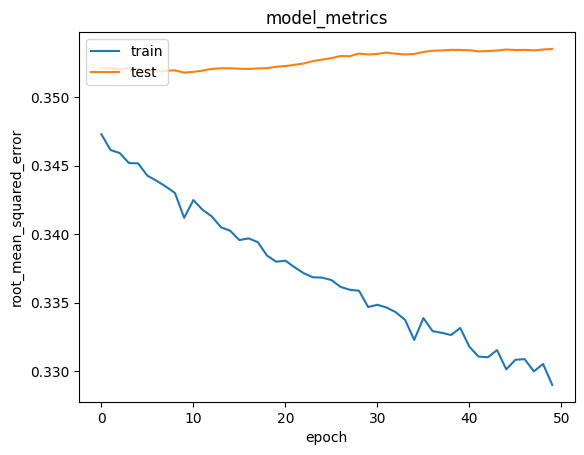

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()